<a href="https://colab.research.google.com/github/Farrukh077/Assignment/blob/main/week%2012%20lab%20work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import sqlite3 as sl
con = sl.connect('my-test.db')

In [57]:
with con:
    con.execute("""
        CREATE TABLE USER (
            id INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT,
            name TEXT,
            age INTEGER
        );
    """)

In [58]:
sql = 'INSERT INTO USER (id, name, age) values(?, ?, ?)'
data = [
    (1, 'Alice', 21),
    (2, 'Bob', 22),
    (3, 'Chris', 23),
    (4, 'Joyle', 16),
    (5, 'Fischer',17)
]

In [59]:
with con:
    con.executemany(sql, data)

In [60]:
with con:
    data = con.execute("SELECT * FROM USER WHERE age >=17")
    for row in data:
        print(row)

(1, 'Alice', 21)
(2, 'Bob', 22)
(3, 'Chris', 23)
(5, 'Fischer', 17)


In [61]:
with con:
    data = con.execute("SELECT * FROM USER WHERE age BETWEEN 21 and 23")
    for row in data:
        print(row)

(1, 'Alice', 21)
(2, 'Bob', 22)
(3, 'Chris', 23)


In [62]:
with con:
    data = con.execute("SELECT * FROM USER WHERE age > 21 and age < 23")
    for row in data:
        print(row)

(2, 'Bob', 22)


In [63]:
with con:
    data = con.execute("SELECT * FROM USER WHERE age <= 22")
    for row in data:
        print(row)

(1, 'Alice', 21)
(2, 'Bob', 22)
(4, 'Joyle', 16)
(5, 'Fischer', 17)


In [66]:
import pandas as pd
df_skill = pd.DataFrame({
    'user_id': [1,1,2,2,3,3,3,4,5],
    'skill': ['Network Security', 'Algorithm Development', 'Network Security', 'Java', 'Python', 'Data Science', 'Machine Learning', 'Android Developer', 'Graphic Designer']
})
df_skill

,user_id,skill
0,1,Network Security
1,1,Algorithm Development
2,2,Network Security
3,2,Java
4,3,Python
5,3,Data Science
6,3,Machine Learning
7,4,Android Developer
8,5,Graphic Designer


In [65]:
df_skill.to_sql('SKILL', con)
df = pd.read_sql('''
    SELECT s.user_id, u.name, u.age, s.skill 
    FROM USER u LEFT JOIN SKILL s ON u.id = s.user_id
''', con)

df

,user_id,name,age,skill
0,1,Alice,21,Algorithm Development
1,1,Alice,21,Network Security
2,2,Bob,22,Java
3,2,Bob,22,Network Security
4,3,Chris,23,Data Science
5,3,Chris,23,Machine Learning
6,3,Chris,23,Python
7,4,Joyle,16,Android Developer
8,5,Fischer,17,Graphic Designer


In [36]:
df.to_sql('USER_SKILL', con)

In [37]:
%load_ext sql
from random import uniform, choice
import time
from datetime import datetime, timedelta
import pandas as pd
%matplotlib inline

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [38]:
%sql sqlite:///demo.db3

'Connected: @demo.db3'

In [39]:

%sql SELECT date('now');

 * sqlite:///demo.db3
Done.


date('now')
2022-11-17


In [40]:
%sql SELECT date('now','start of month','+1 month','-1 day');

 * sqlite:///demo.db3
Done.


"date('now','start of month','+1 month','-1 day')"
2022-11-30


In [41]:
%%sql sqlite://
DROP TABLE IF EXISTS Temperature;
CREATE TABLE Temperature (Timestamp DATETIME NOT NULL, Temperature NUMERIC NOT NULL)

Done.
Done.


[]

In [42]:
%%sql sqlite://
CREATE UNIQUE INDEX idx_timestamp ON Temperature (Timestamp);

Done.


[]

In [43]:
def dt(days):
    return timedelta(days=days)

N_rows = 500
now = datetime.now()

for i in range(N_rows):
    timestamp = now - dt(days=(N_rows - i))
    temperature = uniform(18, 26)
    %sql INSERT INTO Temperature VALUES (:timestamp, :temperature);

 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 r

In [44]:
%sql SELECT datetime(Timestamp) as Date, Temperature FROM Temperature LIMIT 5

 * sqlite:///demo.db3
Done.


Date,Temperature
2021-07-05 07:51:53,22.58263596103249
2021-07-06 07:51:53,23.11918563322275
2021-07-07 07:51:53,23.31765578630966
2021-07-08 07:51:53,22.53463483128921
2021-07-09 07:51:53,20.514151244929955


In [45]:
%%sql sqlite://
SELECT Timestamp as Date, Temperature
FROM Temperature
WHERE Date <= '2022-06-31 14:21:45'

Done.


Date,Temperature
2021-07-05 07:51:53.098870,22.58263596103249
2021-07-06 07:51:53.098870,23.11918563322275
2021-07-07 07:51:53.098870,23.31765578630966
2021-07-08 07:51:53.098870,22.53463483128921
2021-07-09 07:51:53.098870,20.514151244929955
2021-07-10 07:51:53.098870,20.559214397644084
2021-07-11 07:51:53.098870,21.399305460455498
2021-07-12 07:51:53.098870,20.72371188682519
2021-07-13 07:51:53.098870,18.402551347262687
2021-07-14 07:51:53.098870,21.149832058283394


In [46]:
%%sql sqlite://
SELECT Timestamp as Date, Temperature 
FROM Temperature
WHERE CAST(strftime('%Y', Date) as Int) = 2021

Done.


Date,Temperature
2021-07-05 07:51:53.098870,22.58263596103249
2021-07-06 07:51:53.098870,23.11918563322275
2021-07-07 07:51:53.098870,23.31765578630966
2021-07-08 07:51:53.098870,22.53463483128921
2021-07-09 07:51:53.098870,20.514151244929955
2021-07-10 07:51:53.098870,20.559214397644084
2021-07-11 07:51:53.098870,21.399305460455498
2021-07-12 07:51:53.098870,20.72371188682519
2021-07-13 07:51:53.098870,18.402551347262687
2021-07-14 07:51:53.098870,21.149832058283394


In [47]:
%%sql sqlite://
SELECT strftime('%Y', Timestamp) as Year, 
       AVG(Temperature) AS MEAN_TMP,
       MAX(Temperature) AS MAX_TMP,
       MIN(Temperature) AS MIN_TMP
FROM Temperature
GROUP BY strftime('%Y', Timestamp)

Done.


Year,MEAN_TMP,MAX_TMP,MIN_TMP
2021,22.077021500059068,25.903347204751693,18.03331496320903
2022,21.968863560694412,25.98503392110837,18.018689657978953


In [48]:
ts = %sql SELECT datetime(Timestamp) as date, Temperature FROM Temperature
df = ts.DataFrame()
df.set_index("date", inplace = True) 
df.index = pd.to_datetime(df.index)
df.index

 * sqlite:///demo.db3
Done.


DatetimeIndex(['2021-07-05 07:51:53', '2021-07-06 07:51:53',
               '2021-07-07 07:51:53', '2021-07-08 07:51:53',
               '2021-07-09 07:51:53', '2021-07-10 07:51:53',
               '2021-07-11 07:51:53', '2021-07-12 07:51:53',
               '2021-07-13 07:51:53', '2021-07-14 07:51:53',
               ...
               '2022-11-07 07:51:53', '2022-11-08 07:51:53',
               '2022-11-09 07:51:53', '2022-11-10 07:51:53',
               '2022-11-11 07:51:53', '2022-11-12 07:51:53',
               '2022-11-13 07:51:53', '2022-11-14 07:51:53',
               '2022-11-15 07:51:53', '2022-11-16 07:51:53'],
              dtype='datetime64[ns]', name='date', length=500, freq=None)

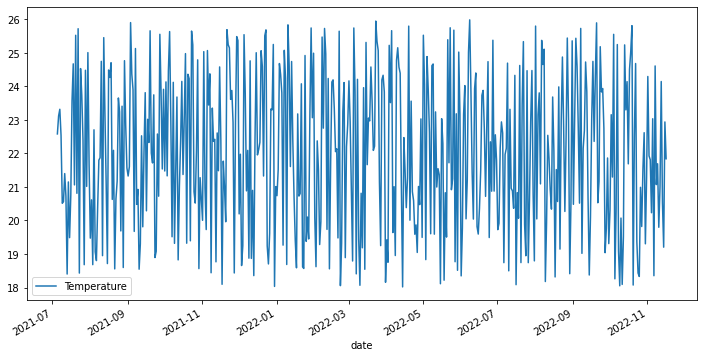

In [49]:

df.plot(figsize=(12, 6))